In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
file = 'E:/ANN Practice/House Price Predicition/Housing.csv'
df = pd.read_csv(file)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df = df.dropna()
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.duplicated().sum()

0

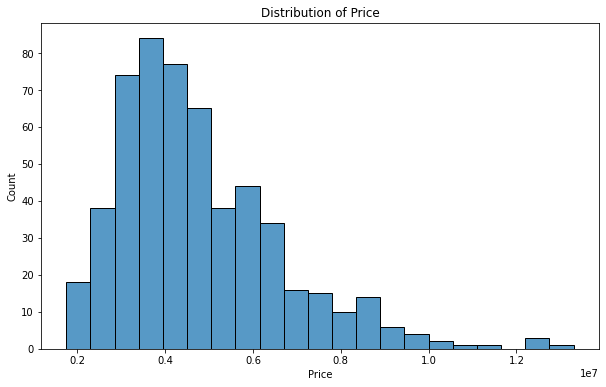

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

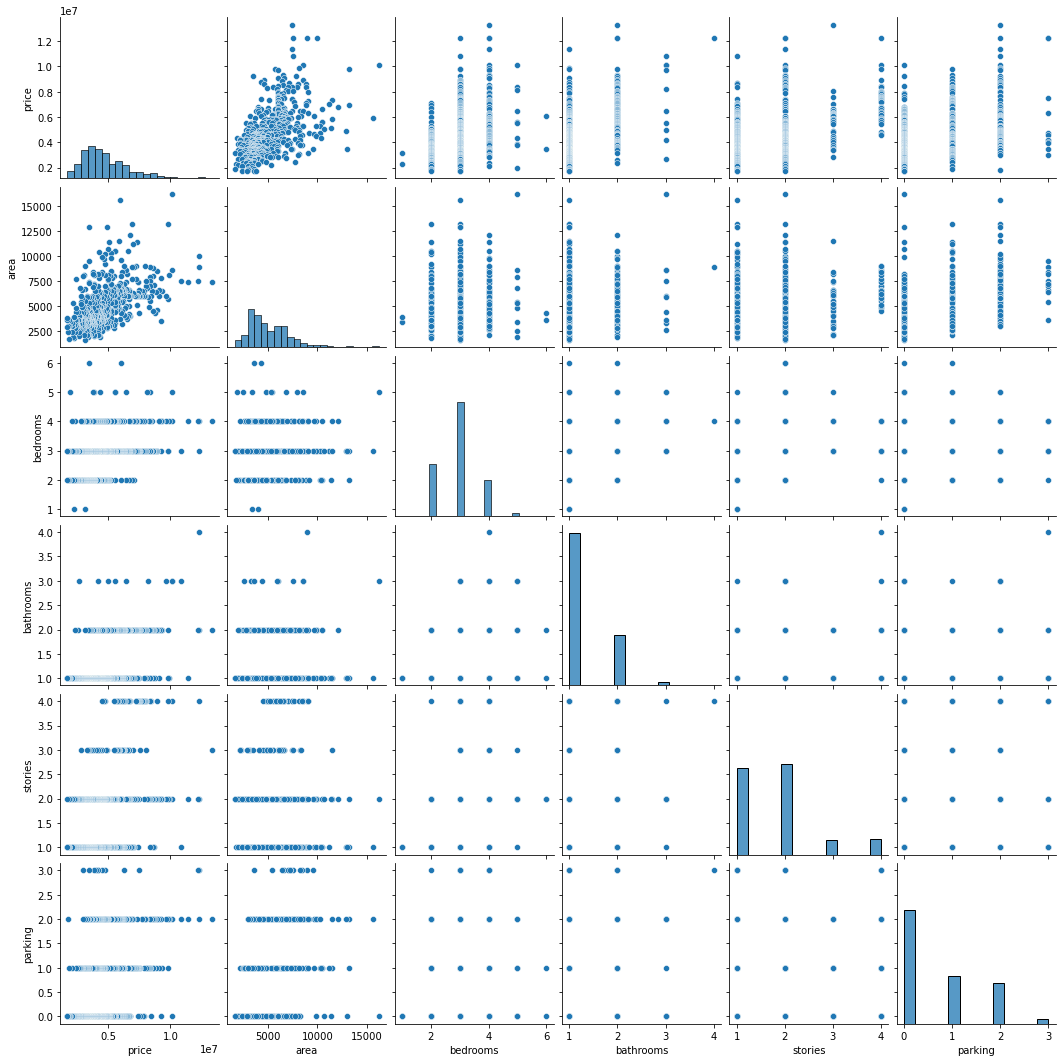

In [8]:
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.show()

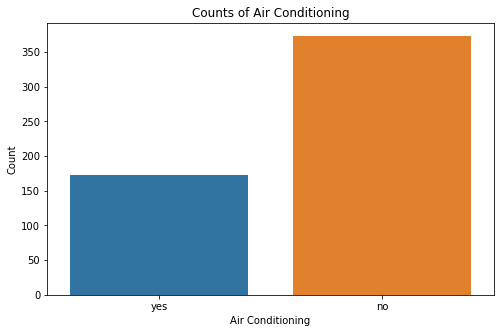

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='airconditioning', data=df)
plt.title('Counts of Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Count')
plt.show()

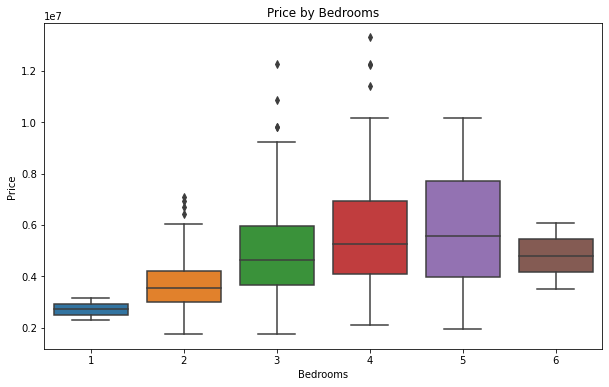

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


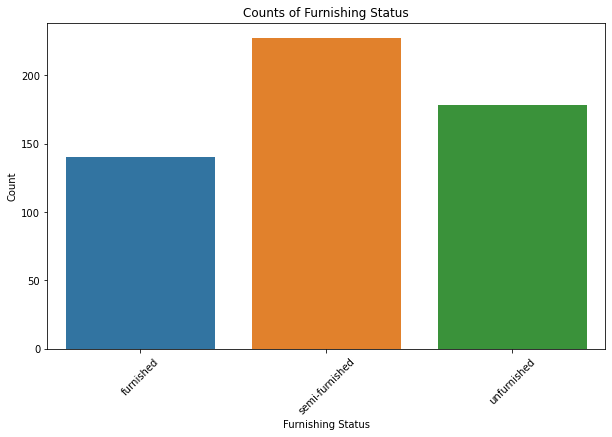

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='furnishingstatus', data=df)
plt.title('Counts of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

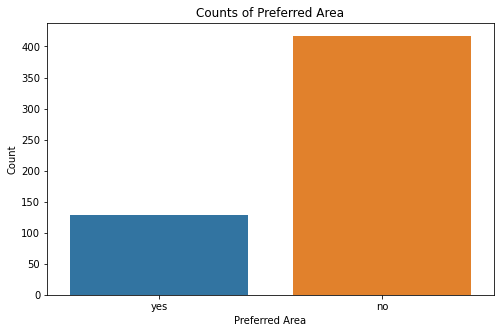

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='prefarea', data=df)
plt.title('Counts of Preferred Area')
plt.xlabel('Preferred Area')
plt.ylabel('Count')
plt.show()


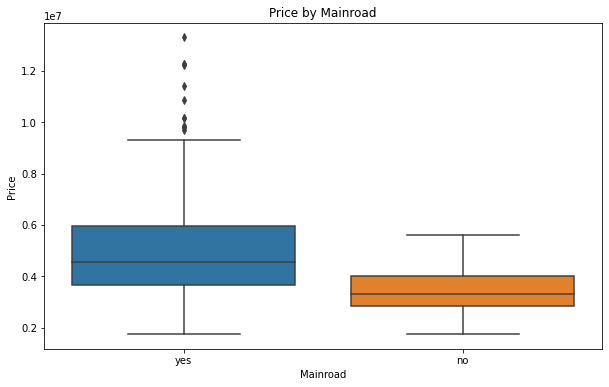

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mainroad', y='price', data=df)
plt.title('Price by Mainroad')
plt.xlabel('Mainroad')
plt.ylabel('Price')
plt.show()


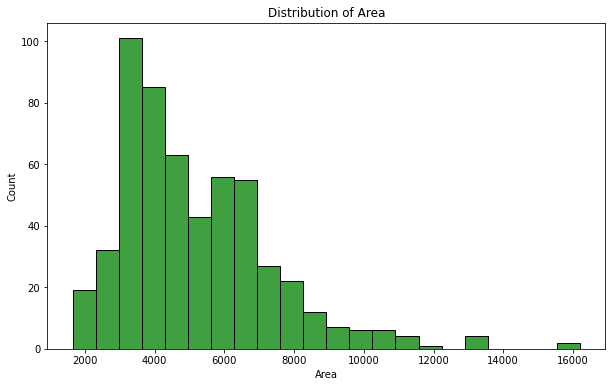

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], color='green')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()


In [17]:
le=LabelEncoder()
df["furnishingstatus"]=le.fit_transform(df["furnishingstatus"])
df["mainroad"]=le.fit_transform(df["mainroad"])
df["guestroom"]=le.fit_transform(df["guestroom"])
df["basement"]=le.fit_transform(df["basement"])
df["hotwaterheating"]=le.fit_transform(df["hotwaterheating"])
df["airconditioning"]=le.fit_transform(df["airconditioning"])
df["prefarea"]=le.fit_transform(df["prefarea"])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


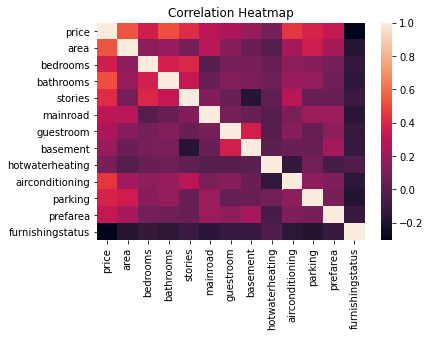

In [18]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

No handles with labels found to put in legend.


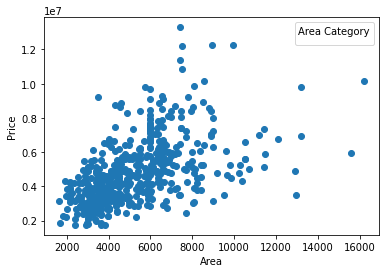

In [20]:
plt.scatter(df["area"], df["price"])
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(title='Area Category')
plt.show()

In [22]:
data =df.copy()
q5 = df["area"].quantile(0.05)
q95 = df["area"].quantile(0.95)
data = df[(df["area"] >= q5) & (data["area"] <= q95)]
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1855000,2990,2,1,1,0,0,0,0,0,1,0,2
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


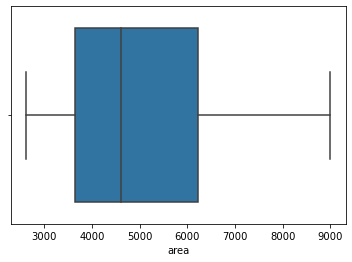

In [23]:
sns.boxplot(x=data['area'])
plt.show()

In [52]:
data.shape

(492, 13)

In [53]:
X = data.drop(['price'],axis=1)
y = data['price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
print(X_train.shape)
print(X_test.shape)

(393, 12)
(99, 12)


In [67]:
#hyperparameters 
units1 = 128
activation1 = 'relu'
units2 = 128
activation2 = 'relu'
lr = 1e-3

In [68]:
model = keras.Sequential()
model.add(layers.Input(shape=(12,)))
model.add(layers.Dense(units=units1, activation=activation1))
model.add(layers.Dense(units=units2, activation=activation2))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1664      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18305 (71.50 KB)
Trainable params: 18305 (71.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [70]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [71]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 1s 22ms/step - loss: 26264303828992.0000 - mean_absolute_error: 4798783.0000 - val_loss: 26540221923328.0000 - val_mean_absolute_error: 4734720.5000
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 26264282857472.0000 - mean_absolute_error: 4798780.0000 - val_loss: 26540192563200.0000 - val_mean_absolute_error: 4734716.5000
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 26264247205888.0000 - mean_absolute_error: 4798776.5000 - val_loss: 26540140134400.0000 - val_mean_absolute_error: 4734712.0000
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 26264177999872.0000 - mean_absolute_error: 4798771.0000 - val_loss: 26540068831232.0000 - val_mean_absolute_error: 4734705.0000
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 26264077336576.0000 - mean_absolute_error: 4798761.5000 - val_loss: 26539947196416.0000 - val_mean_absolute_error: 4734694

In [72]:
best_epoch = history.history['val_loss'].index(min(history.history['val_loss']))

In [74]:
best_model = keras.Sequential()
best_model.add(layers.Input(shape=(12,)))
best_model.add(layers.Dense(units=units1, activation=activation1))
best_model.add(layers.Dense(units=units2, activation=activation2))
best_model.add(layers.Dense(1, activation='linear'))

best_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                   loss='mean_squared_error',
                   metrics=['mean_absolute_error'])

best_model.fit(X_train, y_train, epochs=best_epoch + 1, validation_data=(X_test, y_test))


Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 26264310120448.0000 - mean_absolute_error: 4798783.0000 - val_loss: 26540224020480.0000 - val_mean_absolute_error: 4734720.5000
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 26264284954624.0000 - mean_absolute_error: 4798780.5000 - val_loss: 26540192563200.0000 - val_mean_absolute_error: 4734717.0000
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 26264240914432.0000 - mean_absolute_error: 4798776.5000 - val_loss: 26540138037248.0000 - val_mean_absolute_error: 4734712.0000
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 26264173805568.0000 - mean_absolute_error: 4798770.0000 - val_loss: 26540049956864.0000 - val_mean_absolute_error: 4734704.0000
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 26264058462208.0000 - mean_absolute_error: 4798760.0000 - val_loss: 26539919933440.0000 - val_mean_absolute_error: 4734692

In [76]:
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 3ms/step


In [77]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 4734721.222222222


In [78]:
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 26540234341162.617


In [79]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 5151721.492973259


In [80]:
r2 = r2_score(y_test, y_pred)
print('R-squared (R2):', r2)


R-squared (R2): -5.437664831682312


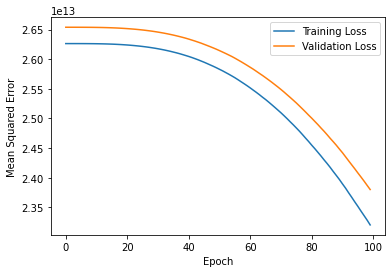

In [81]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


# Trying other Models

In [82]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)

In [84]:
y_pred=lr_model.predict(X_test)

In [85]:
lr_model.score(X_test,y_test)

0.6913773458621097

In [86]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=7)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.70196928, 0.60575256, 0.63983643, 0.6826576 , 0.76048246])

In [87]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR

models=[("LinearRegression",LinearRegression()),
        ("LogisticRegression",LogisticRegression()),
        ("DecisionTreeRegressor",DecisionTreeRegressor(random_state=42)),
        ("RandomForestRegressor",RandomForestRegressor(random_state=42)),
        ("Ridge",Ridge()),
        ("Lasso",Lasso()),
        ("KNeighborsClassifier",KNeighborsClassifier()),
        ("GradientBoostingRegressor",GradientBoostingRegressor()),
        ("SVR",SVR())]

for name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print(f'Model: {name}')
    print(f'R-squared (R2): {r2}\n')

Model: LinearRegression
R-squared (R2): 0.6913773458621097

Model: LogisticRegression
R-squared (R2): 0.344463613265132

Model: DecisionTreeRegressor
R-squared (R2): 0.3990916886452279

Model: RandomForestRegressor
R-squared (R2): 0.6432082847973488

Model: Ridge
R-squared (R2): 0.691254661730216

Model: Lasso
R-squared (R2): 0.6913771187458924

Model: KNeighborsClassifier
R-squared (R2): 0.0492178717192725

Model: GradientBoostingRegressor
R-squared (R2): 0.6792062971400654

Model: SVR
R-squared (R2): -0.026672411668684726



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [95]:
import joblib
joblib.dump(model,"E:/ANN Practice/House Price Predicition/Predicting_Housing_Price.pkl")

['E:/ANN Practice/House Price Predicition/Predicting_Housing_Price.pkl']

In [98]:
import joblib

model = joblib.load("E:/ANN Practice/House Price Predicition/Predicting_Housing_Price.pkl")

def get_user_inputs():
    print("Please provide the following information:")
    print("Print if your answer yes then 1 else 0")
    print("Print if Furnishing status options: furnished=0, semi-furnished=1, unfurnished=2")
    area = float(input("Area in square feet: "))
    bedrooms = int(input("Number of bedrooms: "))
    bathrooms = int(input("Number of bathrooms: "))
    stories = int(input("Number of stories: "))
    mainroad = int(input("Main road access (yes=1/no=0): "))
    guestroom = int(input("Guest room available (yes=1/no=0): "))
    basement = int(input("Basement available (yes=1/no=0): "))
    hotwaterheating = int(input("Hot water heating (yes=1/no=0): "))
    airconditioning = int(input("Air conditioning (yes=1/no=0): "))
    parking = int(input("Number of parking spaces: "))
    prefarea = int(input("Preferred area yes=1/no=0): "))
    furnishingstatus =int(input("Furnishing status: "))
    
    
    user_inputs = {
        "area": area,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "stories": stories,
        "mainroad": mainroad,
        "guestroom": guestroom,
        "basement": basement,
        "hotwaterheating": hotwaterheating,
        "airconditioning": airconditioning,
        "parking":parking,
        "prefarea": prefarea,
        "furnishingstatus":furnishingstatus
    }
    
    return user_inputs


user_inputs = get_user_inputs()

user_df = pd.DataFrame([user_inputs])

predicted_price = model.predict(user_df)

print(f"Predicted Housing Price: Rs {predicted_price[0]/100:,.2f} ")

Please provide the following information:
Print if your answer yes then 1 else 0
Print if Furnishing status options: furnished=0, semi-furnished=1, unfurnished=2
Area in square feet: 6500
Number of bedrooms: 4
Number of bathrooms: 2
Number of stories: 2
Main road access (yes=1/no=0): 1
Guest room available (yes=1/no=0): 1
Basement available (yes=1/no=0): 0
Hot water heating (yes=1/no=0): 1
Air conditioning (yes=1/no=0): 1
Number of parking spaces: 2
Preferred area yes=1/no=0): 1
Furnishing status: 0
Predicted Housing Price: Rs27,947,526.37 
